In [1]:

import numpy as np
import jax.numpy as jnp

from scoobpsf.imshows import *
import scoobpsf.jax_scoob as jscoob
import scoobpsf.jax_dm as jdm

from importlib import reload

Jax platform: gpu
Jax device: NVIDIA A100 80GB PCIe


In [2]:
!nvidia-smi

Thu Sep 14 16:43:31 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 530.30.02              Driver Version: 530.30.02    CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                  Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100 80GB PCIe           On | 00000000:25:00.0 Off |                    0 |
| N/A   33C    P0               64W / 300W|    423MiB / 81920MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

In [2]:
from astropy.io import fits
inf_cube = fits.getdata('inf_cube.fits')
inf_sampling = fits.getheader('inf_cube.fits')['SAMPLING']

In [13]:
reload(jdm)
DM = jdm.DeformableMirror(inf_cube=inf_cube, inf_sampling=inf_sampling)

hit this


In [33]:
reload(jdm)
DM = jdm.DeformableMirror(inf_cube='inf_cube.fits')

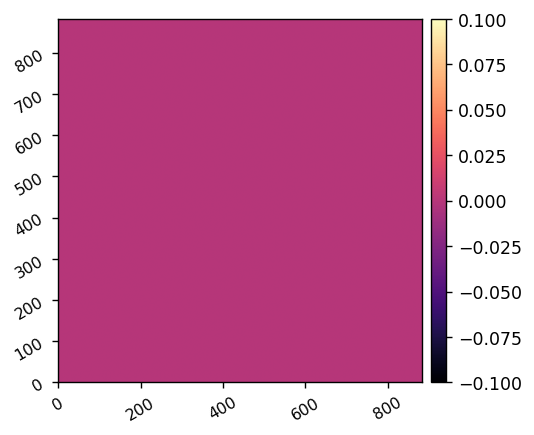

In [45]:
imshow1(np.asarray(DM.get_surface()))

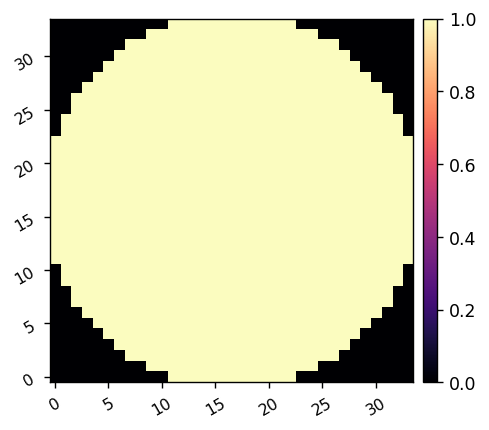

In [4]:
imshow1(np.asarray(DM.dm_mask))

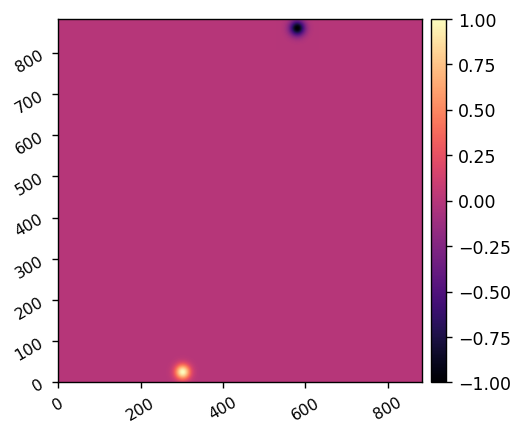

In [5]:
imshow1(np.asarray(DM.inf_cube[0] - DM.inf_cube[-1]))

In [113]:
inf_cube.shape

(952, 958, 958)

2023-09-19 12:21:42.034061: E external/org_tensorflow/tensorflow/compiler/xla/python/pjit.cc:461] fastpath_data is none


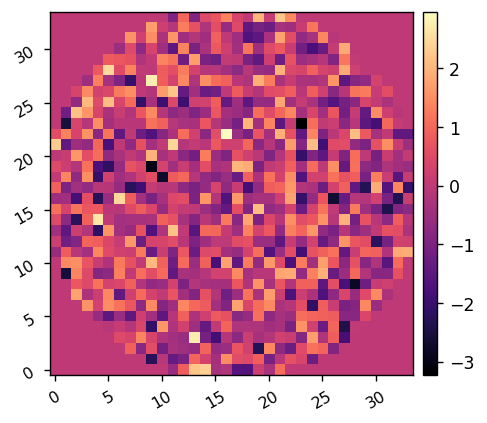

In [6]:

acts = jnp.array(np.random.randn(DM.Nacts))
imshow1(np.asarray(DM.map_actuators_to_command(acts)))

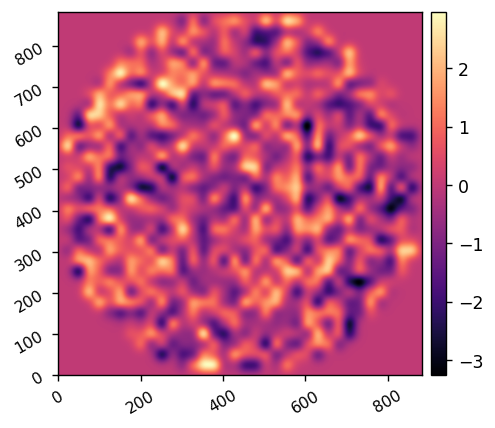

In [14]:
DM.actuators = acts
imshow1(np.asarray(DM.get_surface()))

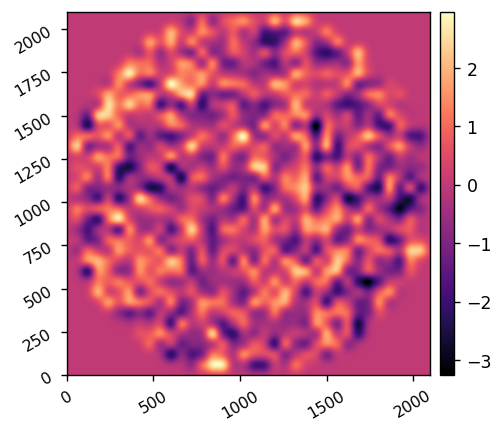

In [15]:
DM.actuators = acts
imshow1(np.asarray(DM.get_surface(pixelscale=5*u.um/u.pix)))